In [32]:
import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv(r"D:\downloads\tripadvisor_hotel_reviews.csv")

# CLEANING THE DATA

In [34]:
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [35]:
df[ "Rating"].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [36]:
df_neg = df.loc[df["Rating"] < 2]
df_neg = df_neg.reset_index(drop=True)

In [37]:
df_five = df.loc[df[ "Rating"] >= 3]
df_five = df_five.reset_index (drop = True)

In [38]:
df_pos = df_five.loc[:len(df_neg)]

In [39]:
len(df_pos)

1422

In [40]:
df_all=pd.concat([df_neg, df_pos], axis=0)
df_all=df_all.reset_index(drop= True)
len(df_all)

2843

In [41]:
df_all.head()

Review  Rating
0  horrible customer service hotel stay february ...       1
1  noise airconditioner-a standard, arranged stay...       1
2  bad choice, booked hotel hot wire called immed...       1
3  hated inn terrible, room-service horrible staf...       1
4  ace grunge lives does mold mildew tiny bed met...       1

# CREATE A SENTIMENTS COLUMN

In [42]:
df_all["Sentiment"] = np.where(df_all["Rating"] >= 3, "Positive", "Negative" )

In [43]:
df_all = df_all.sample(frac = 1)
df_all.reset_index(drop = True)

Review  Rating Sentiment
0     booking fraud just returned barcelona trip cha...       1  Negative
1     dissapointed magnolia maybe expectations high ...       3  Positive
2     excellent stay spent 4 nights chancellor octob...       4  Positive
3     great hotel great hotel, good sized clean room...       5  Positive
4     rudest staff seen, booked rooms employees stay...       1  Negative
...                                                 ...     ...       ...
2838  star hotel, thank goodness got good deal price...       3  Positive
2839  cool knew san francisco arrived cool damp room...       3  Positive
2840  doubletree did n't disappoint, venture boston ...       3  Positive
2841  warm weather cold shoulder husband vacations f...       1  Negative
2842  comfortable friendly petite auberge frommer gu...       5  Positive

[2843 rows x 3 columns]

In [44]:
df_all.head(10)

Review  Rating Sentiment
1341  booking fraud just returned barcelona trip cha...       1  Negative
1838  dissapointed magnolia maybe expectations high ...       3  Positive
2766  excellent stay spent 4 nights chancellor octob...       4  Positive
1463  great hotel great hotel, good sized clean room...       5  Positive
134   rudest staff seen, booked rooms employees stay...       1  Negative
846   reservations beware wanted trip lifetime, thin...       1  Negative
670   disaster, awful experience, travelling daughte...       1  Negative
1600  wonderful time sheraton stayed sheraton augues...       5  Positive
1085  save hassel sorry say not resort looking, 1 tr...       1  Negative
272   worst nightmare life stayed bavaro princess de...       1  Negative

# SPLITTING THE DATA

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_all.Review, df_all.Sentiment)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_vec = v.fit_transform(x_train)
x_test_vec = v.transform(x_test)

# CLASSIFICATION

In [47]:
from sklearn import svm
clf_svm = svm.SVC(kernel = "linear")
clf_svm.fit(x_train_vec, y_train)

SVC(kernel='linear')

# TESTING THE RESULTS

In [48]:
clf_svm.score(x_test_vec, y_test)

0.9451476793248945

In [49]:
from sklearn.metrics import f1_score
f1_score(y_test, clf_svm.predict(x_test_vec), average = None)

array([0.94751009, 0.94256259])

# TESTING THE USER INPUT

In [50]:
rev = ["nice"]
rev_vec = v.transform(rev)
clf_svm.predict(rev_vec)

array(['Positive'], dtype=object)

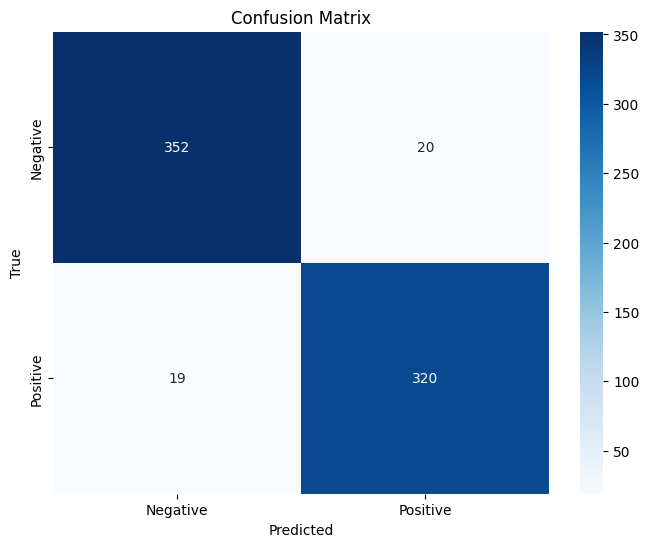

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = clf_svm.predict(x_test_vec)

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Bar plot for the distribution of ratings

C:\Users\amana\AppData\Local\Temp\ipykernel_11100\2370956984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df_all, palette='Set1')


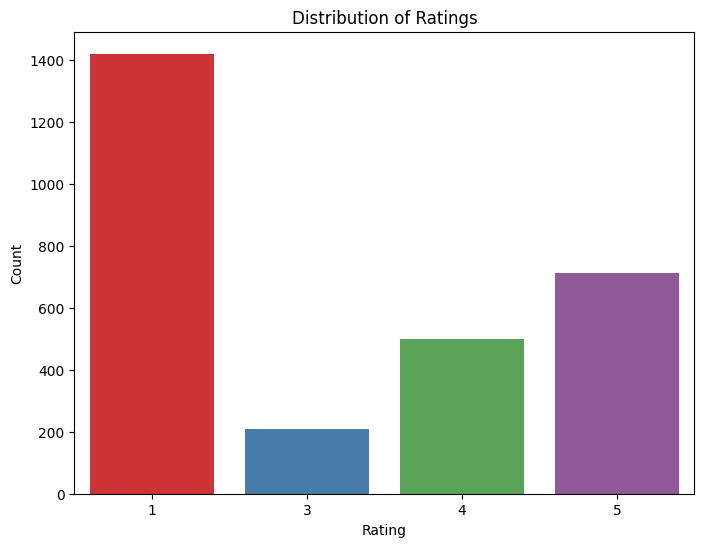

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df_all, palette='Set1')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Bar plot for the distribution of sentiments

C:\Users\amana\AppData\Local\Temp\ipykernel_11100\4117307774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_all, palette='Set2')


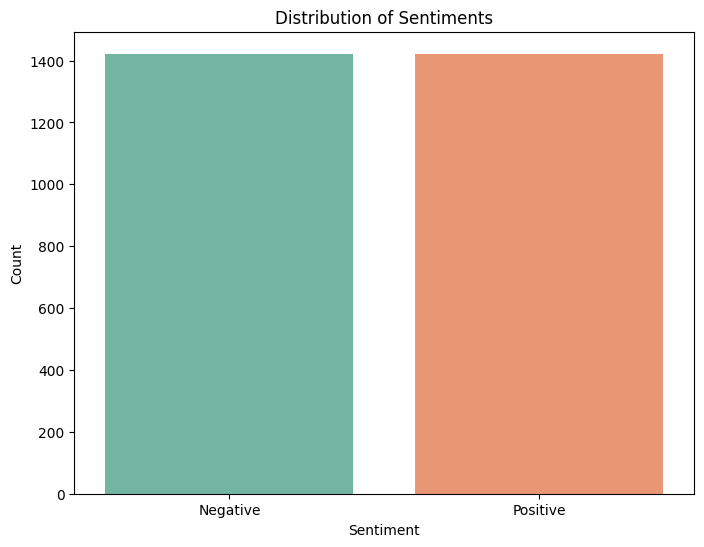

In [53]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df_all, palette='Set2')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()